In [1]:
from ising import monte_carlo, magnetization
import numpy as np
import matplotlib.pyplot as plt

In [2]:
size = 1_000
n_steps = 100_000
beta = 2.0
J = 1.0
h = 0.0

In [3]:
def calculate_acf(size=size, n_steps = n_steps, beta=beta, J=J, h=h):
    """Calculate the autocorrelation function using fast fourier transform"""
    configuration = np.random.choice(np.array([-1, 1]), size)
    current_energy, average_spins = monte_carlo(n_steps, beta, J, h, configuration)
    x = average_spins - average_spins.mean()
    N = float(len(x))
    pow2 = int(2**np.ceil(np.log2(len(x))))
    x_new = np.zeros(pow2,float)
    x_new[:len(x)] = x
    FT = np.fft.fft(x_new)
    acf = (np.fft.ifft(FT*np.conjugate(FT)).real)/N
    acf /= acf.max()
    acf = acf[:int(len(acf))//2]
    return acf[::size]

In [4]:
corrs = [calculate_acf() for _ in range(300)]

In [5]:
corr=np.array(corrs).mean(axis=0)

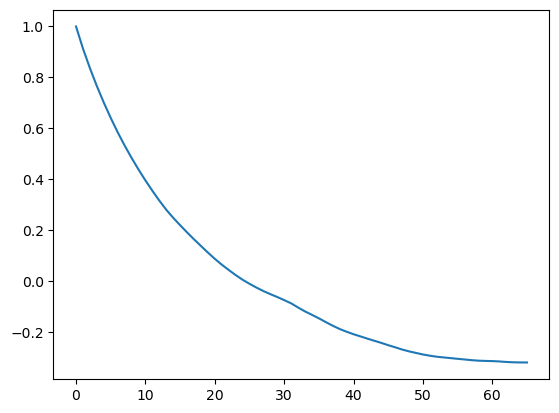

In [6]:
plt.plot(corr)

In [7]:
from scipy.optimize import curve_fit

In [8]:
def exponential_decay(x, tau, a=1, c=0):
    return a * np.exp(-x/tau)

In [9]:
x = np.arange(66)

In [10]:
params, _ = curve_fit(exponential_decay, x, corr)

/Users/shivomgupta/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


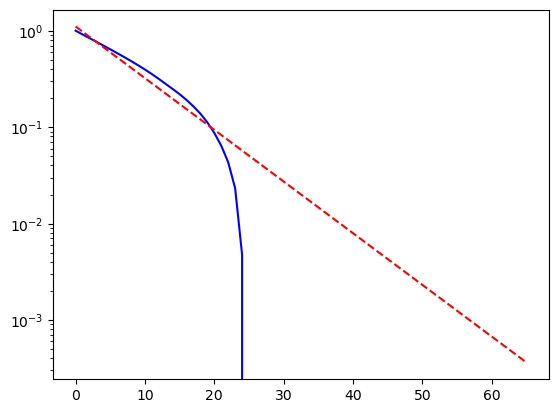

In [11]:
plt.plot(x, corr, 'b-', label='data')
plt.plot(x, exponential_decay(x, *params), 'r--', label='fit')
plt.yscale('log')

In [12]:
params

array([8.10276519, 1.10507376, 1.        ])

In [13]:
tau = 1/2

In [14]:
for i in x:
    tau += corr[i]
    if i >= 6 * tau:
        break
    else:
        continue

In [15]:
corr

array([ 1.        ,  0.91332073,  0.83648503,  0.76587467,  0.70110854,
        0.64079298,  0.5845625 ,  0.53246504,  0.48387821,  0.4381987 ,
        0.39509377,  0.3544627 ,  0.31579489,  0.28002279,  0.24832246,
        0.21915706,  0.19086919,  0.16360666,  0.13757263,  0.1116152 ,
        0.08689709,  0.06408364,  0.04316875,  0.02320274,  0.00475795,
       -0.01124339, -0.02620008, -0.03980671, -0.05191756, -0.06325023,
       -0.0754736 , -0.08808666, -0.10437838, -0.1198172 , -0.13327229,
       -0.14694149, -0.1618187 , -0.17615465, -0.18899013, -0.19977899,
       -0.20956397, -0.21814113, -0.2269075 , -0.23530326, -0.24363414,
       -0.25263575, -0.26096415, -0.26968832, -0.27696835, -0.28308559,
       -0.28918034, -0.29406473, -0.29805968, -0.30084179, -0.30351754,
       -0.30625551, -0.30879448, -0.31154548, -0.31353759, -0.31457182,
       -0.31517957, -0.31657589, -0.31856256, -0.31991509, -0.3205052 ,
       -0.32066038])

In [16]:
tau

7.314633823731198